## Importing Required Libraries

In [13]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Assigning Path for Dataset

In [14]:
TRAIN_DIR = "E:/.finalyear project/facedataset/train"
TEST_DIR = "E:/.finalyear project/facedataset//test"
BATCH_SIZE=64

### Will see how many categories and images present

In [15]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise


In [16]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Surprise


### Will see some random images withe their labels

In [17]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img

In [18]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (480, 640, 3)
Image shape (416, 416, 3)
Image shape (480, 640, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


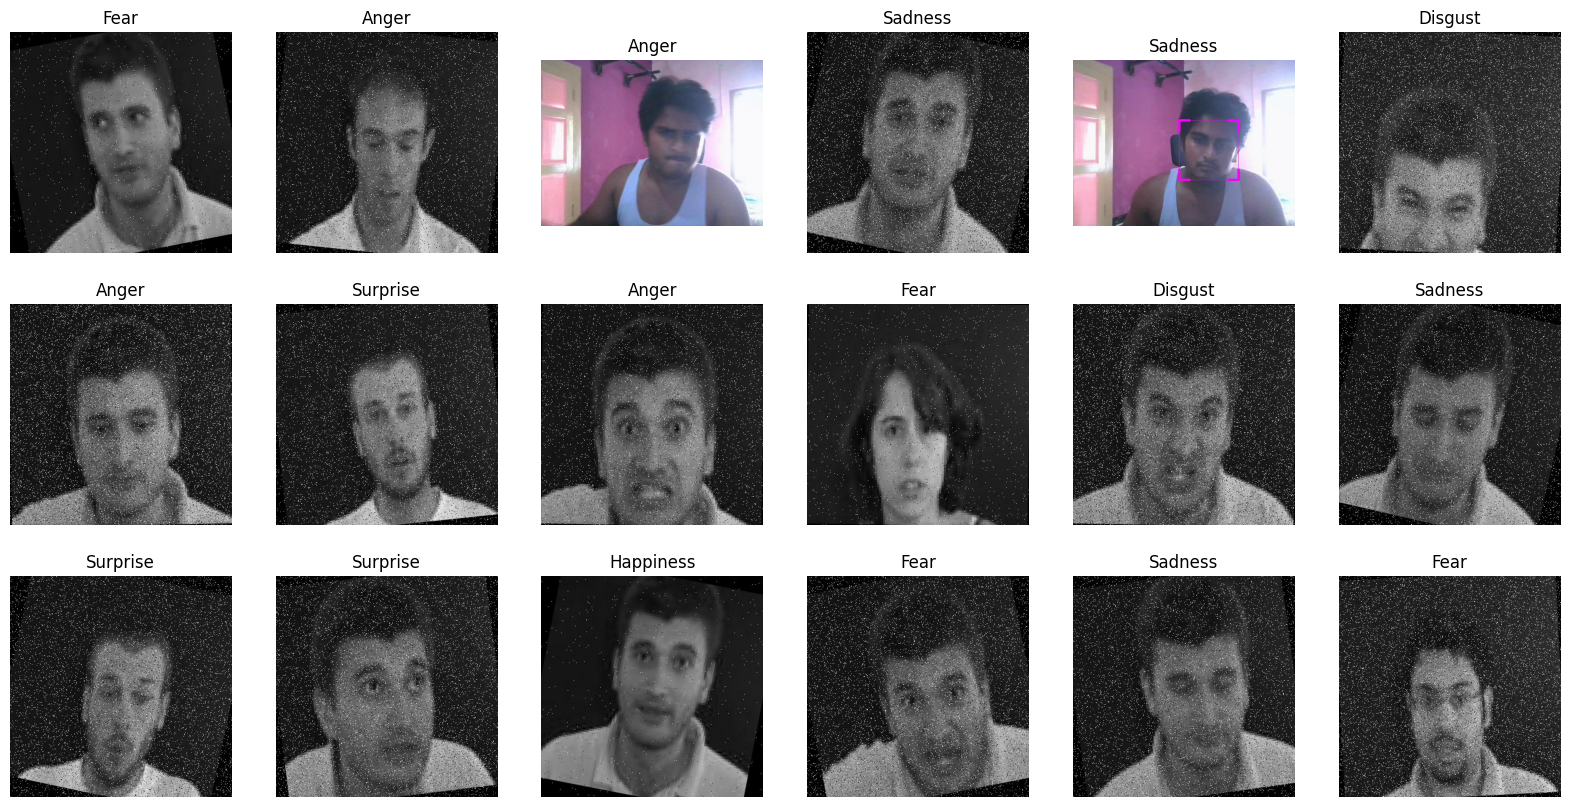

In [19]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="E:/.finalyear project/facedataset/train/", target_class=class_name)

### Preparing data for training

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 12527 images belonging to 6 classes.
Found 2288 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [21]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
## model summary
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,390 (14.09 MB)

 Trainable params: 3,692,390 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = classifier.fit(training_set,
                         epochs = 10,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.2113 - loss: 2.0298 - val_accuracy: 0.4218 - val_loss: 1.3458
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 125s 624ms/step - accuracy: 0.3454 - loss: 1.5578 - val_accuracy: 0.5765 - val_loss: 1.0130
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 150s 754ms/step - accuracy: 0.4250 - loss: 1.4130 - val_accuracy: 0.6307 - val_loss: 0.9208
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 153s 769ms/step - accuracy: 0.4745 - loss: 1.2868 - val_accuracy: 0.6897 - val_loss: 0.7910
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 148s 725ms/step - accuracy: 0.5231 - loss: 1.1739 - val_accuracy: 0.6888 - val_loss: 0.7933
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 737ms/step - accuracy: 0.5802 - loss: 1.0696 - val_accuracy: 0.7443 - val_loss: 0.6737
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 139s 697ms/step - accuracy: 0.6111 - loss: 0.9716 - val_accuracy: 0.7334 - val_loss: 0.6817
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 140s 704ms/step - accuracy: 0.6273 - lo

### Evaluating the model

In [24]:
classifier.evaluate(test_set)

36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - accuracy: 0.7458 - loss: 0.6195


[0.6058412790298462, 0.753496527671814]

Text(0, 0.5, 'Loss')

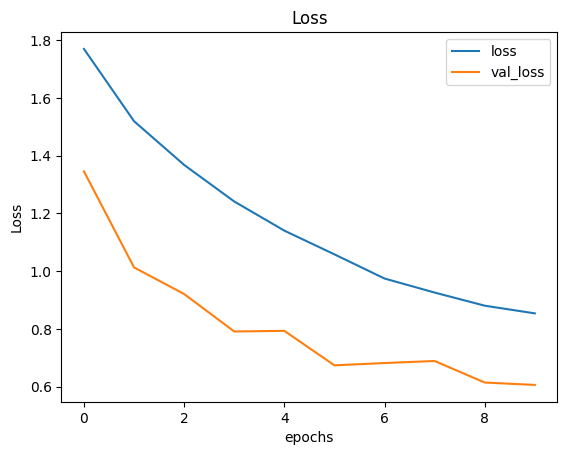

In [25]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

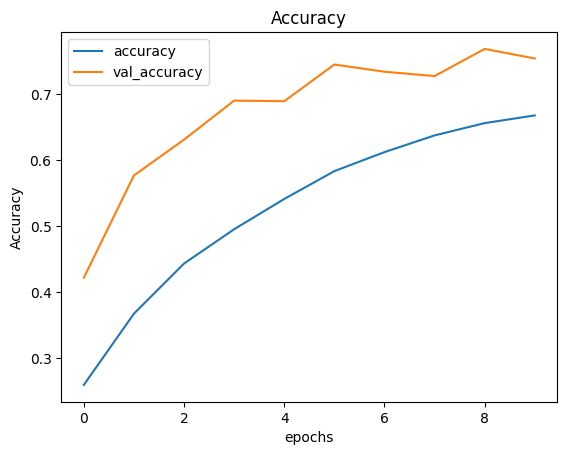

In [26]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [27]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/Downloads/lokeshpic.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


0

In [28]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}